In [144]:
import pandas as pd
from datetime import datetime
import datetime
from dateutil import parser
import matplotlib.pyplot as plt

<h1>Load CSV Files</h1>

In [145]:
user_engagement = pd.read_csv("takehome_user_engagement.csv")

In [146]:
user_engagement.tail(10)

,time_stamp,user_id,visited
207907,2014-04-28 14:22:45,11991,1
207908,2014-05-17 14:22:45,11991,1
207909,2014-05-30 14:22:45,11991,1
207910,2014-04-11 19:39:56,11992,1
207911,2013-10-22 13:33:17,11995,1
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1
207916,2014-01-26 08:57:12,12000,1


In [147]:
users = pd.read_csv("takehome_users.csv")

In [148]:
users.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


<h1>Determine Adopted Users</h1>
An apopted user as logged in three separate days over a week

In [149]:
all_logged_in_users = set(user_engagement["user_id"])

In [150]:
all_logged_in_users

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 10,
 11,
 13,
 14,
 17,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 28,
 29,
 30,
 31,
 33,
 36,
 37,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 103,
 105,
 106,
 107,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 119,
 121,
 123,
 124,
 125,
 126,
 127,
 128,
 132,
 133,
 135,
 136,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 146,
 147,
 150,
 151,
 153,
 154,
 155,
 156,
 158,
 159,
 160,
 161,
 162,
 164,
 165,
 167,
 168,
 171,
 172,
 173,
 174,
 175,
 176,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 187,
 188,
 189,
 193,
 195,
 196,
 197,
 198,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 219,
 220,
 221,
 222,
 223,
 225,
 226,
 227,
 228,
 230,
 232,
 

In [151]:
list_logged_in_users = [x for x in all_logged_in_users]

In [152]:
list_logged_in_users

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 10,
 11,
 13,
 14,
 17,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 28,
 29,
 30,
 31,
 33,
 36,
 37,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 103,
 105,
 106,
 107,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 119,
 121,
 123,
 124,
 125,
 126,
 127,
 128,
 132,
 133,
 135,
 136,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 146,
 147,
 150,
 151,
 153,
 154,
 155,
 156,
 158,
 159,
 160,
 161,
 162,
 164,
 165,
 167,
 168,
 171,
 172,
 173,
 174,
 175,
 176,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 187,
 188,
 189,
 193,
 195,
 196,
 197,
 198,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 219,
 220,
 221,
 222,
 223,
 225,
 226,
 227,
 228,
 230,
 232,
 

<h1>Collect Logged in Times</h1>

In [153]:
logged_in_times = {}
for i in list_logged_in_users:
    logged_in_times[i] = user_engagement[user_engagement["user_id"] == i]["time_stamp"]

In [154]:
logged_in_times

{1: 0    2014-04-22 03:53:30
 Name: time_stamp, dtype: object, 2: 1     2013-11-15 03:45:04
 2     2013-11-29 03:45:04
 3     2013-12-09 03:45:04
 4     2013-12-25 03:45:04
 5     2013-12-31 03:45:04
 6     2014-01-08 03:45:04
 7     2014-02-03 03:45:04
 8     2014-02-08 03:45:04
 9     2014-02-09 03:45:04
 10    2014-02-13 03:45:04
 11    2014-02-16 03:45:04
 12    2014-03-09 03:45:04
 13    2014-03-13 03:45:04
 14    2014-03-31 03:45:04
 Name: time_stamp, dtype: object, 3: 15    2013-03-19 23:14:52
 Name: time_stamp, dtype: object, 4: 16    2013-05-22 08:09:28
 Name: time_stamp, dtype: object, 5: 17    2013-01-22 10:14:20
 Name: time_stamp, dtype: object, 6: 18    2013-12-19 03:37:06
 Name: time_stamp, dtype: object, 7: 19    2012-12-20 13:24:32
 Name: time_stamp, dtype: object, 10: 20     2013-01-16 22:08:03
 21     2013-01-22 22:08:03
 22     2013-01-30 22:08:03
 23     2013-02-04 22:08:03
 24     2013-02-06 22:08:03
 25     2013-02-14 22:08:03
 26     2013-02-17 22:08:03
 27     2

<h1>Select Users with at Least Three Log-Ins</h1>

In [155]:
three_times_plus = {}
for i in logged_in_times:
    if len(logged_in_times[i]) > 3:
        three_times_plus[i] = logged_in_times[i]

In [156]:
three_times_plus

{8192: 142546    2013-03-22 20:06:52
 142547    2013-04-21 20:06:52
 142548    2013-04-23 20:06:52
 142549    2013-05-07 20:06:52
 142550    2013-05-11 20:06:52
 142551    2013-05-19 20:06:52
 142552    2013-05-20 20:06:52
 142553    2013-06-02 20:06:52
 142554    2013-06-14 20:06:52
 142555    2013-06-19 20:06:52
 142556    2013-06-20 20:06:52
 142557    2013-06-23 20:06:52
 142558    2013-06-25 20:06:52
 142559    2013-06-26 20:06:52
 142560    2013-06-27 20:06:52
 142561    2013-07-02 20:06:52
 142562    2013-07-04 20:06:52
 142563    2013-07-07 20:06:52
 142564    2013-07-20 20:06:52
 142565    2013-07-21 20:06:52
 142566    2013-07-22 20:06:52
 142567    2013-07-25 20:06:52
 142568    2013-08-01 20:06:52
 142569    2013-08-07 20:06:52
 142570    2013-08-09 20:06:52
 142571    2013-08-13 20:06:52
 142572    2013-08-15 20:06:52
 142573    2013-08-19 20:06:52
 142574    2013-08-21 20:06:52
 142575    2013-08-22 20:06:52
                  ...         
 142614    2014-02-10 20:06:52
 1

<h1>Determine if a User is Adopted</h1>

In [157]:
adopted_users = []
for i in three_times_plus:
    for j in range(len(three_times_plus[i]) - 2):
        if parser.parse(three_times_plus[i].iloc[j]) + datetime.timedelta(days=7) < parser.parse(three_times_plus[i].iloc[j + 2]):
            if i not in adopted_users:
                adopted_users.append(i)

In [158]:
adopted_users

[8192,
 2,
 8196,
 8201,
 10,
 20,
 8214,
 8217,
 8220,
 8221,
 33,
 8232,
 8233,
 42,
 43,
 8239,
 50,
 8243,
 53,
 60,
 8254,
 63,
 8258,
 8259,
 69,
 8265,
 74,
 8269,
 8270,
 80,
 81,
 82,
 8277,
 8278,
 87,
 8280,
 95,
 8294,
 8297,
 8310,
 8311,
 8314,
 126,
 8319,
 133,
 135,
 136,
 141,
 142,
 8337,
 146,
 153,
 8348,
 160,
 165,
 168,
 171,
 172,
 174,
 8371,
 185,
 188,
 8381,
 8383,
 197,
 200,
 8393,
 202,
 203,
 8399,
 209,
 8403,
 214,
 8408,
 221,
 8415,
 230,
 8426,
 8435,
 245,
 247,
 8440,
 8442,
 251,
 8448,
 8235,
 263,
 265,
 8460,
 8463,
 8466,
 275,
 280,
 283,
 297,
 298,
 8493,
 305,
 310,
 311,
 8505,
 8507,
 8508,
 8511,
 321,
 322,
 8523,
 337,
 341,
 345,
 8538,
 347,
 351,
 8252,
 362,
 363,
 367,
 370,
 375,
 8569,
 8255,
 383,
 8581,
 390,
 8585,
 9504,
 397,
 398,
 401,
 8595,
 8601,
 8602,
 8604,
 417,
 418,
 8615,
 430,
 8629,
 445,
 8639,
 8640,
 450,
 9633,
 460,
 462,
 469,
 471,
 472,
 478,
 479,
 481,
 483,
 8677,
 8679,
 492,
 494,
 497,
 502,
 

<h1>Add Column to Mark Adopted Users</h1>

In [159]:
for i in range(len(users)):
    if users.iloc[i-1, 0] in adopted_users:
        users.loc[i-1,"adopted_user"] = True
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,NaN
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,True


<h2>Correlation with Opting in to Receiving Marketing Emails</h2>

In [160]:
num_opted_in = 0
for i in range(len(users)):
    if users.loc[i, "opted_in_to_mailing_list"] == 1:
        num_opted_in += 1
print("Percentage of all users opted in: " + str(float(num_opted_in)/len(users)))

adopted_num = 0
adopted_num_opted_in = 0
for i in range(len(users)):
    if users.loc[i, "opted_in_to_mailing_list"] == 1 and users.loc[i, "adopted_user"] == True:
        adopted_num_opted_in += 1
    if users.loc[i, "adopted_user"] == True:
        adopted_num += 1
print("Percentage of adopted users opted in: " + str(float(adopted_num_opted_in)/adopted_num))

Percentage of all users opted in: 0.2495
Percentage of adopted users opted in: 0.256


<h3>Insight</h3>
The adopted users opted in to receiving marketing emails at a slightly higher rate compared to all users

<h2>Correlation with Enabling Marketing Drip</h2>

In [161]:
num_drip = 0
for i in range(len(users)):
    if users.loc[i, "enabled_for_marketing_drip"] == 1:
        num_drip += 1
print("Percentage of all users enabled marketing drip: " + str(float(num_drip)/len(users)))

adopted_num = 0
adopted_num_drip = 0
for i in range(len(users)):
    if users.loc[i, "enabled_for_marketing_drip"] == 1 and users.loc[i, "adopted_user"] == True:
        adopted_num_drip += 1
    if users.loc[i, "adopted_user"] == True:
        adopted_num += 1
print("Percentage of adopted users enabled marketing drip: " + str(float(adopted_num_drip)/adopted_num))

Percentage of all users enabled marketing drip: 0.149333333333
Percentage of adopted users enabled marketing drip: 0.1575


<h3>Insight</h3>
The adopted users were on the marketing drip at a slightly higher rate compared to all users

<h2>Connection with How Account Was Created</h2>

In [162]:
source = {"GUEST_INVITE":0, "ORG_INVITE": 0, "SIGNUP": 0, "PERSONAL_PROJECTS": 0, "SIGNUP_GOOGLE_AUTH": 0}

In [163]:
for i in range(len(users)):
    source[users.loc[i, "creation_source"]] += 1
source

{'GUEST_INVITE': 2163,
 'ORG_INVITE': 4254,
 'PERSONAL_PROJECTS': 2111,
 'SIGNUP': 2087,
 'SIGNUP_GOOGLE_AUTH': 1385}

In [164]:
total_users = 0
for v in source.values():
    total_users += v
print("Users: " + str(total_users))
for k, v in source.items():
    print str(k) + ": " + str(v/float(total_users))

Users: 12000
ORG_INVITE: 0.3545
PERSONAL_PROJECTS: 0.175916666667
SIGNUP: 0.173916666667
GUEST_INVITE: 0.18025
SIGNUP_GOOGLE_AUTH: 0.115416666667


In [165]:
adopted_source = {"GUEST_INVITE":0, "ORG_INVITE": 0, "SIGNUP": 0, "PERSONAL_PROJECTS": 0, "SIGNUP_GOOGLE_AUTH": 0}

In [166]:
for i in range(len(users)):
    if users.loc[i, "adopted_user"] == True:
        adopted_source[users.loc[i, "creation_source"]] += 1
adopted_source

{'GUEST_INVITE': 456,
 'ORG_INVITE': 694,
 'PERSONAL_PROJECTS': 205,
 'SIGNUP': 367,
 'SIGNUP_GOOGLE_AUTH': 278}

In [167]:
total_adopted_users = 0
for v in adopted_source.values():
    total_adopted_users += v
print("Adopted users: " + str(total_adopted_users))
for k, v in adopted_source.items():
    print str(k) + ": " + str(v/float(total_adopted_users))

Adopted users: 2000
ORG_INVITE: 0.347
PERSONAL_PROJECTS: 0.1025
SIGNUP: 0.1835
GUEST_INVITE: 0.228
SIGNUP_GOOGLE_AUTH: 0.139


In [168]:
total_minus_adopted = {"GUEST_INVITE":0, "ORG_INVITE": 0, "SIGNUP": 0, "PERSONAL_PROJECTS": 0, "SIGNUP_GOOGLE_AUTH": 0}

In [169]:
for i in range(len(users)):
    if users.loc[i, "adopted_user"] != True:
        total_minus_adopted[users.loc[i, "creation_source"]] += 1
total_minus_adopted

{'GUEST_INVITE': 1707,
 'ORG_INVITE': 3560,
 'PERSONAL_PROJECTS': 1906,
 'SIGNUP': 1720,
 'SIGNUP_GOOGLE_AUTH': 1107}

In [170]:
total_minus_adopted_users = 0
for v in total_minus_adopted.values():
    total_minus_adopted_users += v
print("Adopted users: " + str(total_minus_adopted_users))
for k, v in total_minus_adopted.items():
    print str(k) + ": " + str(v/float(total_minus_adopted_users))

Adopted users: 10000
ORG_INVITE: 0.356
PERSONAL_PROJECTS: 0.1906
SIGNUP: 0.172
GUEST_INVITE: 0.1707
SIGNUP_GOOGLE_AUTH: 0.1107


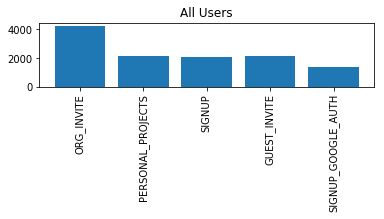

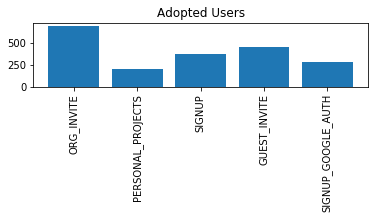

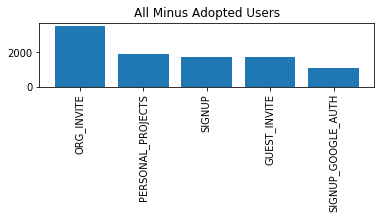

In [171]:
plt.subplot(311)
plt.title("All Users")
plt.bar(range(len(source)), source.values(), align='center')
plt.xticks(range(len(source)), source.keys(), rotation = 90)
plt.show()
plt.subplot(312)
plt.title("Adopted Users")
plt.bar(range(len(adopted_source)), adopted_source.values(), align='center')
plt.xticks(range(len(adopted_source)), adopted_source.keys(), rotation = 90)
plt.show()
plt.subplot(313)
plt.title("All Minus Adopted Users")
plt.bar(range(len(total_minus_adopted)), total_minus_adopted.values(), align='center')
plt.xticks(range(len(total_minus_adopted)), total_minus_adopted.keys(), rotation = 90)
plt.show()

<h3>Insight</h3>
Comparing users who are not adopted users, the adopted users did not sign up after being invited to join another user's personal workspace ("PERSONAL_PROJECTS").  They were also more likely to be invited to an organization as a guest ("GUEST_INVITE"). 

<h1>Bar Graphs of Sign-Ups Over Time</h1>

<h2>All Users</h2>

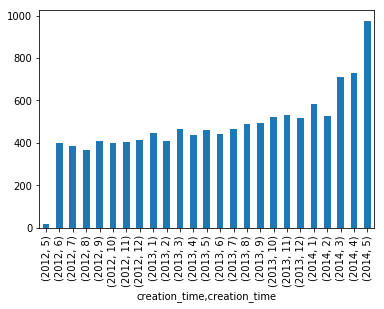

In [172]:
users.loc[:,"creation_time"].groupby([users.loc[:,"creation_time"].apply(parser.parse).dt.year, users.loc[:,"creation_time"].apply(parser.parse).dt.month]).count().plot(kind="bar")

<h3>Insight</h3>
There is a sharp increase in creation of accounts in the last few months recorded

In [173]:
adopted_user_table = users[users["adopted_user"] == True]
not_adopted_user_table = users[users["adopted_user"] != True]

<h2>Adopted Users</h2>

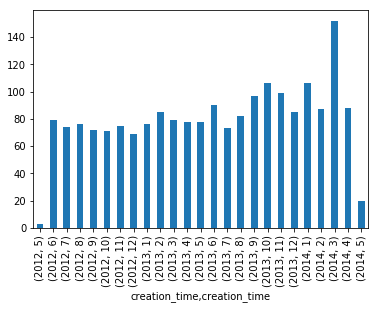

In [174]:
adopted_user_table.loc[:,"creation_time"].groupby([adopted_user_table.loc[:,"creation_time"].apply(parser.parse).dt.year, adopted_user_table.loc[:,"creation_time"].apply(parser.parse).dt.month]).count().plot(kind="bar")

<h3>Insight</h3>
There are more adopted user accounts in the last several months with a spike in March 2014.  The shorter amount of time to visit the website three times in a week may account for the drop in May 2014.

<h2>Not Adopted Users</h2>

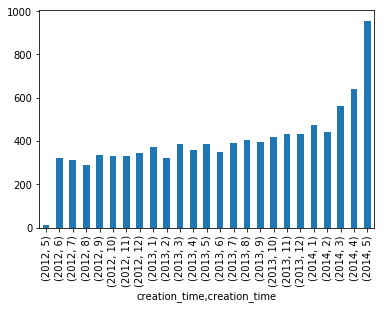

In [175]:
not_adopted_user_table.loc[:,"creation_time"].groupby([not_adopted_user_table.loc[:,"creation_time"].apply(parser.parse).dt.year, not_adopted_user_table.loc[:,"creation_time"].apply(parser.parse).dt.month]).count().plot(kind="bar")

<h3>Insight</h3>
The trend of increasing accounts for not adopted users follows the general trend for all users